In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

## Discover and visualize the data

In [2]:
training_df = pd.read_csv('training.csv')

In [3]:
training_df.head()

,job_id,job_type,hours,city,salary,applications
0,1,9,20,Frankfurt,12.5,17
1,2,8,30,Munich,13.5,31
2,3,5,35,Koln,9.0,27
3,4,1,30,Munich,11.5,22
4,5,2,40,Berlin,9.0,27


In [4]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
job_id          1000 non-null int64
job_type        1000 non-null int64
hours           1000 non-null int64
city            1000 non-null object
salary          1000 non-null float64
applications    1000 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 46.9+ KB


In [5]:
training_df.describe()

,job_id,job_type,hours,salary,applications
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,4.877000,29.780000,19.134000,32.345000
std,288.819436,2.586999,7.095911,6.152593,7.776275
min,1.000000,1.000000,20.000000,9.000000,12.000000
25%,250.750000,3.000000,25.000000,14.000000,27.000000
50%,500.500000,5.000000,30.000000,19.000000,32.000000
75%,750.250000,7.000000,35.000000,24.500000,38.000000
max,1000.000000,9.000000,40.000000,29.500000,58.000000


#### job_id is an index
#### job_type, hours, city are categorical variables
#### salary is an continuous variable

In [6]:
training_df["job_type"]

0      9
1      8
2      5
3      1
4      2
5      5
6      1
7      8
8      5
9      5
10     1
11     9
12     6
13     8
14     5
15     1
16     2
17     1
18     1
19     1
20     3
21     8
22     3
23     4
24     5
25     4
26     6
27     8
28     1
29     3
      ..
970    9
971    7
972    6
973    4
974    3
975    4
976    1
977    6
978    6
979    1
980    2
981    5
982    3
983    8
984    7
985    1
986    6
987    3
988    2
989    7
990    6
991    3
992    8
993    7
994    1
995    4
996    9
997    2
998    3
999    9
Name: job_type, dtype: int64

In [7]:
training_df["hours"].value_counts()

30    213
20    212
40    197
25    196
35    182
Name: hours, dtype: int64

In [8]:
training_df["city"].value_counts()

Koln         221
Munich       206
Berlin       194
Frankfurt    192
Hamburg      187
Name: city, dtype: int64

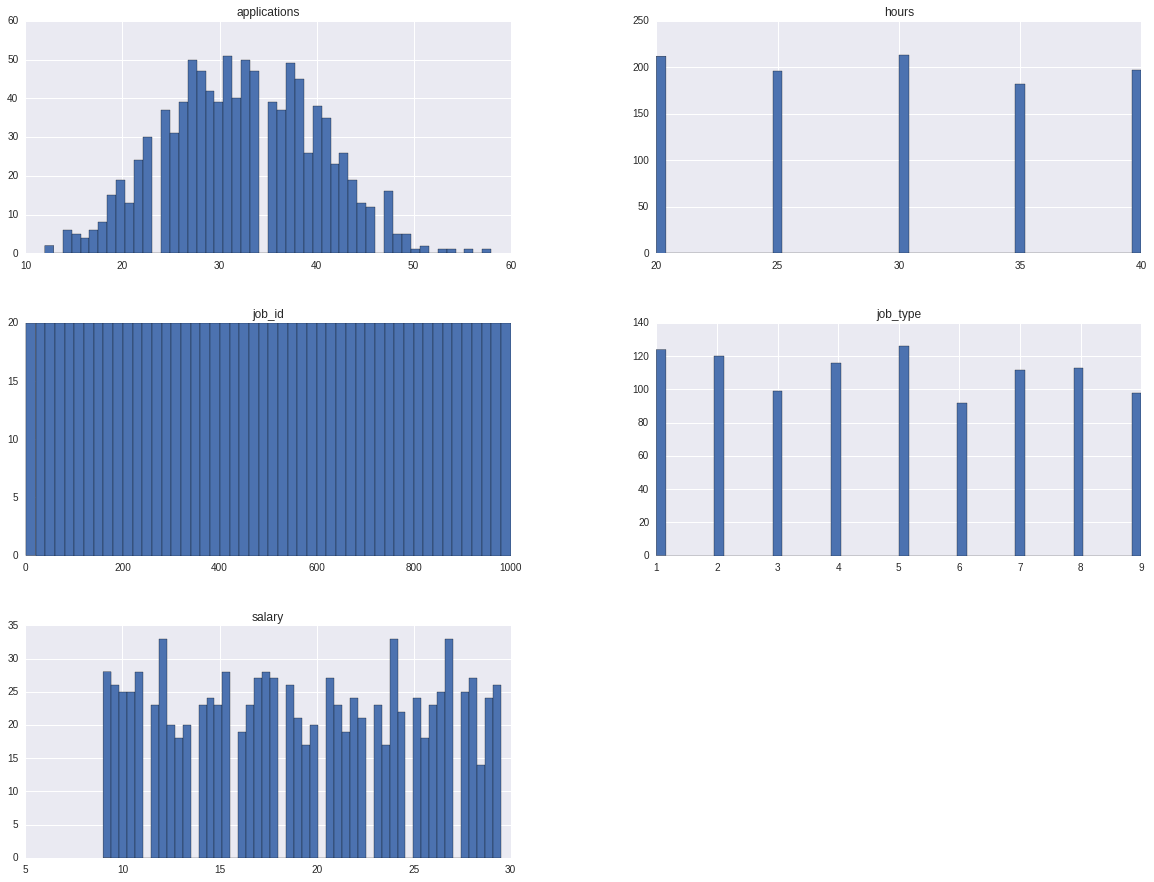

In [9]:
training_df.hist(bins=50, figsize=(20,15))
plt.show()

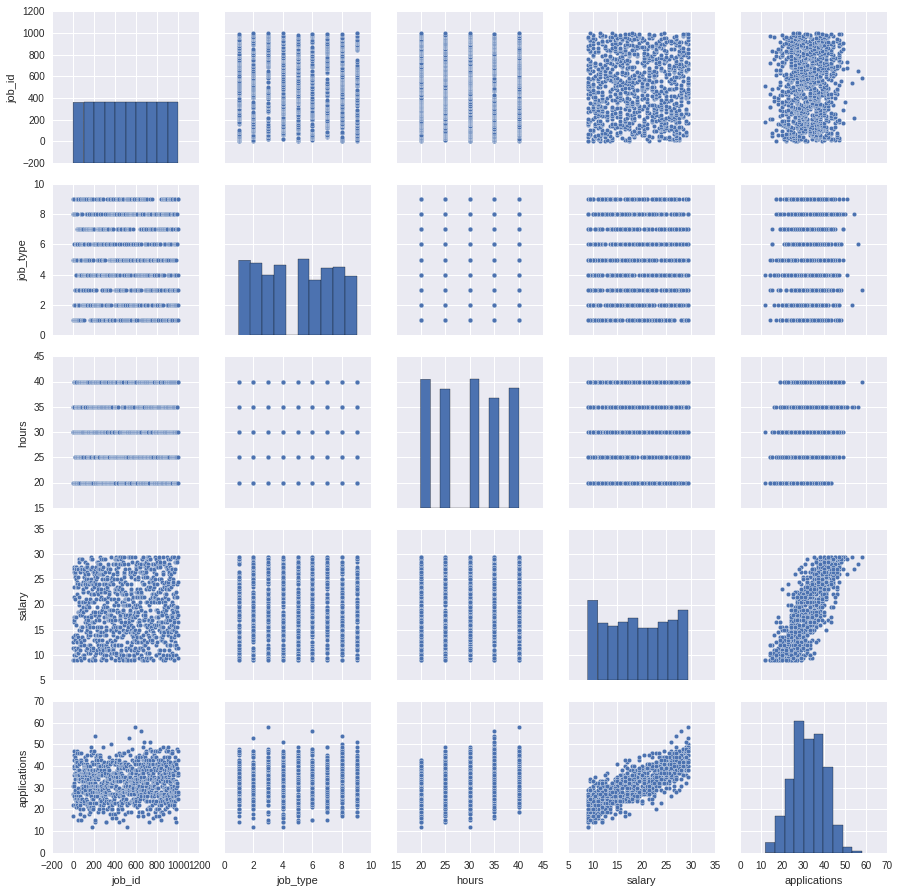

In [10]:
sns.pairplot(training_df);

### salary variable

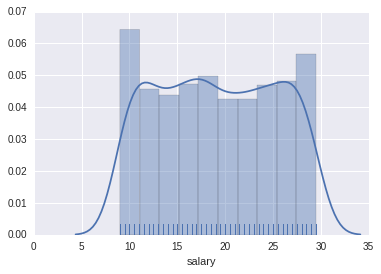

In [11]:
sns.distplot(training_df["salary"], rug=True);

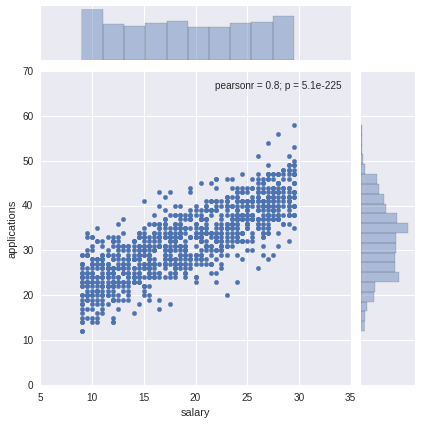

In [12]:
sns.jointplot(x="salary", y="applications", data=training_df);

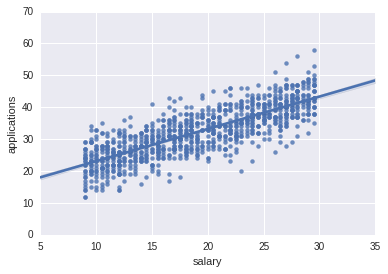

In [13]:
sns.regplot(x="salary", y="applications", data=training_df);

### job_type variable

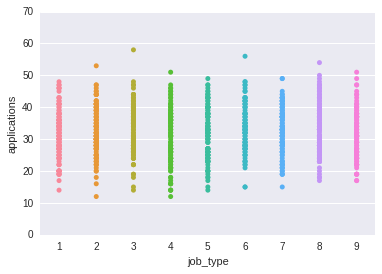

In [14]:
sns.stripplot(x="job_type", y="applications", data=training_df);

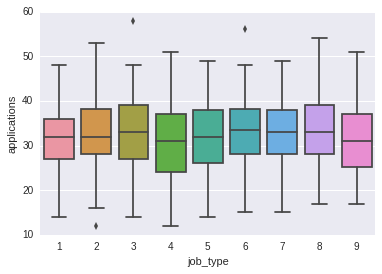

In [15]:
sns.boxplot(x="job_type", y="applications", data=training_df);

### city variable

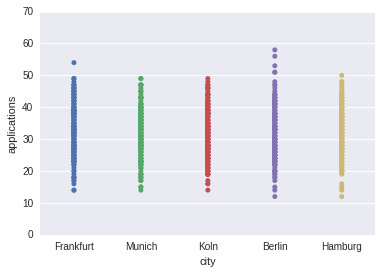

In [16]:
sns.stripplot(x="city", y="applications", data=training_df);

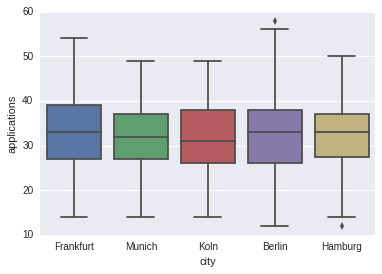

In [17]:
sns.boxplot(x="city", y="applications", data=training_df);

### hours variable

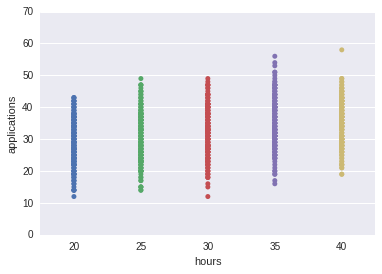

In [18]:
sns.stripplot(x="hours", y="applications", data=training_df);

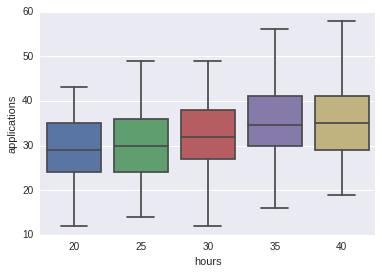

In [19]:
sns.boxplot(x="hours", y="applications", data=training_df);

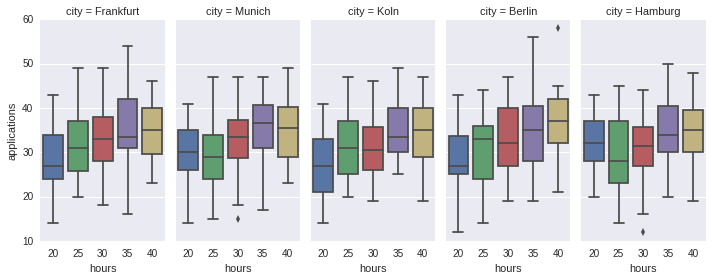

In [20]:
sns.factorplot(x="hours", y="applications",
               col="city", data=training_df, kind="box", size=4, aspect=.5);

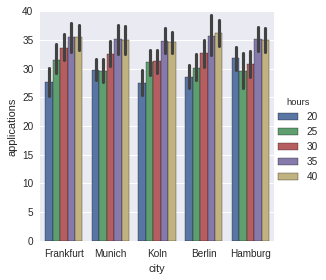

In [21]:
sns.factorplot(x="city", y="applications", hue="hours", data=training_df, kind="bar");

## Prepare the data

In [24]:
jobs = training_df.drop("applications", axis=1)
jobs_labels = training_df["applications"].copy()

In [26]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
city = jobs["city"]
city_encoded = encoder.fit_transform(city)
city_encoded

array([1, 4, 3, 4, 0, 3, 3, 4, 0, 4, 4, 2, 0, 4, 0, 4, 4, 0, 2, 2, 0, 0, 4,
       0, 2, 2, 0, 0, 0, 2, 1, 0, 4, 3, 4, 3, 1, 1, 2, 2, 4, 3, 4, 1, 3, 1,
       1, 4, 1, 0, 0, 0, 1, 1, 4, 0, 4, 3, 2, 4, 0, 1, 2, 1, 2, 2, 2, 4, 3,
       4, 1, 1, 3, 1, 3, 4, 4, 4, 3, 3, 4, 2, 4, 4, 3, 3, 4, 0, 3, 0, 2, 1,
       4, 0, 0, 2, 1, 2, 0, 3, 3, 1, 4, 0, 2, 3, 1, 3, 2, 1, 3, 3, 1, 1, 0,
       1, 0, 3, 0, 0, 4, 4, 3, 4, 2, 2, 4, 4, 3, 4, 2, 0, 2, 0, 3, 1, 0, 0,
       0, 1, 3, 4, 3, 3, 3, 2, 1, 1, 1, 4, 3, 0, 0, 2, 2, 4, 4, 1, 3, 3, 3,
       3, 1, 1, 3, 4, 4, 2, 2, 3, 3, 0, 4, 1, 3, 1, 0, 0, 1, 0, 2, 1, 1, 0,
       1, 0, 3, 0, 4, 1, 0, 2, 2, 2, 3, 3, 4, 0, 0, 1, 0, 3, 3, 4, 3, 3, 0,
       3, 1, 3, 2, 1, 1, 3, 3, 0, 3, 4, 0, 0, 4, 3, 4, 3, 2, 2, 4, 1, 1, 2,
       4, 3, 3, 4, 1, 2, 0, 0, 2, 1, 1, 0, 0, 2, 3, 4, 1, 0, 2, 0, 1, 4, 1,
       0, 2, 0, 0, 0, 3, 0, 3, 2, 4, 2, 2, 1, 2, 1, 4, 3, 1, 0, 0, 0, 4, 2,
       4, 3, 2, 0, 1, 3, 3, 0, 3, 0, 4, 4, 2, 1, 0, 2, 3, 1, 3, 4, 3, 0, 4,
       2, 4,

In [27]:
print(encoder.classes_)

['Berlin' 'Frankfurt' 'Hamburg' 'Koln' 'Munich']


In [28]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
city_1hot = encoder.fit_transform(city)
city_1hot

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       ..., 
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

salary_ix, hours_ix = 0, 1

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        salary_per_hour = X[:, salary_ix] / X[:, hours_ix]
        return np.c_[X, salary_per_hour]

In [30]:
attr_adder = CombinedAttributesAdder()
jobs_extra_attribs = attr_adder.transform(jobs.values)

In [31]:
jobs_extra_attribs = pd.DataFrame(jobs_extra_attribs, columns=list(jobs.columns)+["salary_per_hour"])
jobs_extra_attribs.head()

,job_id,job_type,hours,city,salary,salary_per_hour
0,1,9,20,Frankfurt,12.5,0
1,2,8,30,Munich,13.5,0
2,3,5,35,Koln,9,0
3,4,1,30,Munich,11.5,4
4,5,2,40,Berlin,9,2


In [32]:
jobs_num = jobs.drop(["job_id", "job_type", "city"], axis=1)
jobs_cat = jobs.drop(["job_id","salary"], axis=1)

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [67]:
class NumpySelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, indx):
        self.indx = indx
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[:,self.indx]

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs_hour = ["salary", "hours"]
num_attribs_all = ["salary", "salary_per_hour"]

num_pipeline = Pipeline([
        ('selector_1', DataFrameSelector(num_attribs_hour)),
        ('attribs_adder', CombinedAttributesAdder()),
        ('selector_2', NumpySelector([0,2])),
        ('std_scaler', StandardScaler()),
])

jobs_num_tr = num_pipeline.fit_transform(jobs_num)
jobs_num_tr

array([[-1.07878413, -0.19951487],
       [-0.9161697 , -0.82556078],
       [-1.64793464, -1.51548893],
       ..., 
       [-1.24139856, -1.40688913],
       [-0.83486248, -0.76593736],
       [ 0.87258903, -0.24423243]])

In [70]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
multilabel = mlb.fit_transform(jobs_cat)
multilabel

array([[1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]])

In [78]:
cat_attribs = ["job_type", "hours", "city"]

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
city_1hot = encoder.fit_transform(city)
city_1hot

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       ..., 
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [90]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


mapper = DataFrameMapper(
    [(d, LabelBinarizer()) for d in jobs_cat]
)

cat_pipeline = Pipeline([
        ('label_multibinarizer', mapper)
])

jobs_cat_tr = cat_pipeline.fit_transform(jobs_cat)
jobs_cat_tr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ..., 
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [91]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
])

In [92]:
jobs_prepared = full_pipeline.fit_transform(jobs)
jobs_prepared

array([[-1.07878413, -0.19951487,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.9161697 , -0.82556078,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.64793464, -1.51548893,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ..., 
       [-1.24139856, -1.40688913,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.83486248, -0.76593736,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.87258903, -0.24423243,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [93]:
jobs_prepared.shape

(1000, 21)

## Train Linear Regression model 

In [106]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
lin_reg.fit(jobs_prepared, jobs_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [188]:
import pickle
dumped_model = pickle.dumps(lin_reg)
model = pickle.loads(model)

In [194]:
from sklearn.externals import joblib
joblib.dump(lin_reg, 'model.pkl')

['model.pkl']

In [107]:
from sklearn.metrics import mean_squared_error

app_predictions = lin_reg.predict(jobs_prepared)
lin_mse = mean_squared_error(jobs_labels, app_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.031861283867042

In [108]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(jobs_labels, app_predictions)
lin_mae

3.2336829649175254

In [98]:
from sklearn.metrics import r2_score

lin_r2 = r2_score(jobs_labels, app_predictions)
lin_r2

0.73090693362568016

In [99]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [101]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, jobs_prepared, jobs_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

('Scores:', array([ 4.04258162,  4.09478772,  3.87949409,  3.50566519,  4.65183369,
        3.81314059,  3.98854151,  4.35494131,  4.42453117,  4.35888654]))
('Mean:', 4.1114403439208775)
('Standard deviation:', 0.32255875171281806)


In [103]:
lin_scores = cross_val_score(lin_reg, jobs_prepared, jobs_labels, scoring="r2", cv=10)
display_scores(lin_scores)

('Scores:', array([ 0.74005939,  0.72098189,  0.74975767,  0.74867713,  0.64114933,
        0.7249429 ,  0.76044501,  0.71860379,  0.69047826,  0.67599701]))
('Mean:', 0.71710923750632205)
('Standard deviation:', 0.035658211235141971)


In [122]:
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
reg.fit(jobs_prepared, jobs_labels)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [123]:
app_predictions = reg.predict(jobs_prepared)
reg_r2 = r2_score(jobs_labels, app_predictions)
reg_r2

0.73067471074631418

In [161]:
test_df = pd.read_csv("test.csv")
test_df.head()

,job_id,job_type,hours,city,salary
0,1001,2,40,Hamburg,28.0
1,1002,5,20,Munich,29.0
2,1003,9,35,Munich,25.0
3,1004,6,35,Munich,10.0
4,1005,3,20,Berlin,26.0


In [189]:
jobs_test = test_df

In [190]:
jobs_test_prepared = full_pipeline.fit_transform(jobs_test)
jobs_test_prepared

array([[ 1.29478104,  0.01274076,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.45277751,  2.31462756,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82079164,  0.05658622,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 0.34680224,  0.56519359,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.52217832, -0.4476366 ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26780401, -0.25033202,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [165]:
len(app_test_predictions)

100

In [191]:
job_id_test = test_df["job_id"]

In [167]:
len(job_id_test)

100

In [192]:
app_test_predictions = model.predict(jobs_test_prepared)

In [193]:
pred_test = pd.DataFrame(data={"job_id":job_id_test, "prediction": app_test_predictions})
pred_test

,job_id,prediction
0,1001,42.900032
1,1002,37.829628
2,1003,38.683092
3,1004,24.689107
4,1005,35.371624
5,1006,27.863503
6,1007,37.098502
7,1008,25.583564
8,1009,40.661292
9,1010,28.999496


In [181]:
pred_test.to_csv("predictions.csv", columns=["job_id", "prediction"], index=False)

In [182]:
pd.read_csv("predictions.csv")

,job_id,prediction
0,1001,42.900032
1,1002,37.829628
2,1003,38.683092
3,1004,24.689107
4,1005,35.371624
5,1006,27.863503
6,1007,37.098502
7,1008,25.583564
8,1009,40.661292
9,1010,28.999496


In [195]:
model_presisted = joblib.load("model.pkl")

In [196]:
model_presisted.predict(jobs_test_prepared)

array([ 42.90003248,  37.82962815,  38.683092  ,  24.68910658,
        35.37162387,  27.86350252,  37.09850192,  25.58356361,
        40.66129227,  28.99949632,  34.77208506,  37.76572171,
        36.02437958,  24.08959054,  25.95417933,  42.0782109 ,
        36.83159641,  31.01013433,  26.95768267,  37.49143075,
        29.3932248 ,  33.69597784,  27.76791356,  39.63627344,
        36.70754523,  25.48368676,  40.17439213,  44.94719245,
        24.51437345,  38.22373591,  27.79969927,  27.28252643,
        23.3957278 ,  32.7223643 ,  20.7580958 ,  20.54866311,
        39.65574498,  20.79815826,  27.16749747,  35.42182724,
        30.621449  ,  37.16344669,  39.61962782,  39.80997044,
        25.4188213 ,  25.04362976,  41.32680141,  29.33428586,
        32.10433065,  36.26914689,  25.04362976,  35.07236732,
        30.083537  ,  23.9911839 ,  38.0451854 ,  33.84194678,
        25.93398642,  27.76403374,  32.36128472,  38.86179182,
        30.38940518,  28.05139479,  33.31032108,  27.00